🚀 Starting Transfer Learning with VGG16...
✓ Loaded 5 flower classes
✓ VGG16 Transfer Learning Model Ready!
Training started...
161/161 ━━━━━━━━━━━━━━━━━━━━ 171s 1s/step - accuracy: 0.5897 - loss: 2.7557 - val_accuracy: 0.7838 - val_loss: 0.9319
69/69 ━━━━━━━━━━━━━━━━━━━━ 50s 728ms/step - accuracy: 0.7760 - loss: 0.9669
🎯 FINAL TEST ACCURACY: 78.38%


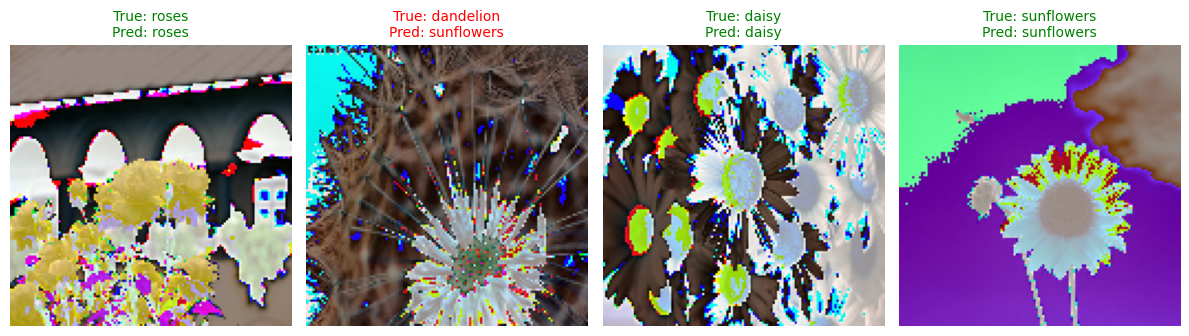

✅ TRANSFER LEARNING COMPLETED!
📊 Accuracy: 78.38% | Classes: ['dandelion', 'daisy', 'tulips', 'sunflowers', 'roses']


In [1]:
# TRANSFER LEARNING WITH VGG16 - FLOWER CLASSIFICATION
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import tensorflow_datasets as tfds
print("🚀 Starting Transfer Learning with VGG16...")

# 1. Load Dataset
(train_ds, test_ds), info = tfds.load('tf_flowers', split=['train[:70%]', 'train[70%:]'], as_supervised=True, with_info=True)
class_names = ['dandelion', 'daisy', 'tulips', 'sunflowers', 'roses']
print(f"✓ Loaded {info.features['label'].num_classes} flower classes")

# 2. Preprocess for VGG16
def preprocess(image, label):
    image = tf.image.resize(image, [128, 128])
    image = tf.keras.applications.vgg16.preprocess_input(image)
    return image, label

BATCH_SIZE = 16
train_data = train_ds.map(preprocess).batch(BATCH_SIZE)
test_data = test_ds.map(preprocess).batch(BATCH_SIZE)

# 3. Create Transfer Learning Model
base_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
base_model.trainable = False  # Freeze VGG16 layers

model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')  # 5 flower types
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print("✓ VGG16 Transfer Learning Model Ready!")

# 4. Train Model
print("Training started...")
history = model.fit(train_data, epochs=1, validation_data=test_data, verbose=1)

# 5. Evaluate
test_loss, test_accuracy = model.evaluate(test_data)
print(f"🎯 FINAL TEST ACCURACY: {test_accuracy:.2%}")

# 6. Quick Demo
plt.figure(figsize=(12, 4))
for images, labels in test_data.take(1):
    predictions = model.predict(images, verbose=0)
    for i in range(4):
        plt.subplot(1, 4, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        pred_class = class_names[np.argmax(predictions[i])]
        true_class = class_names[labels[i]]
        color = 'green' if pred_class == true_class else 'red'
        plt.title(f'True: {true_class}\nPred: {pred_class}', color=color, fontsize=10)
        plt.axis('off')
plt.tight_layout()
plt.show()

print("✅ TRANSFER LEARNING COMPLETED!")
print(f"📊 Accuracy: {test_accuracy:.2%} | Classes: {class_names}")

In [12]:
# Test random image
import random
n = random.randint(0, BATCH_SIZE-1)  # Pick random number

img, label = next(iter(test_data))
pred = model.predict(img)[n]

plt.imshow(img[n])
plt.title(f'True: {class_names[label[n]]}\nPred: {class_names[np.argmax(pred)]}')
plt.axis('off')
plt.show()

print(f"Showing random image #{n}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 607ms/step


IndexError: index 99 is out of bounds for axis 0 with size 16